15810.66314969409


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

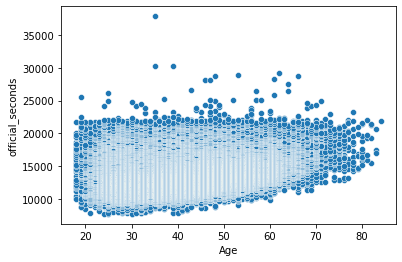

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_2015 = pd.read_csv(r'D:\workspace\DataAnalytics\Day5\marathon_results_2015.csv')
df_2016 = pd.read_csv(r"D:\workspace\DataAnalytics\Day5\marathon_results_2016.csv")
df_2017 = pd.read_csv(r"D:\workspace\DataAnalytics\Day5\marathon_results_2017.csv")

df = pd.concat([df_2015, df_2016, df_2017]).reset_index()

df[['Hours', 'Minutes', 'Seconds']] = df['Official Time'].str.split(":", expand = True).astype(int)
df[['Pace_Hours', 'Pace_Minutes', 'Pace_Seconds']] = df['Pace'].str.split(":", expand = True).astype(int)

df['official_seconds'] = (df['Hours']*3600) + (df['Minutes']*60) + (df['Seconds'])
df['pace_seconds'] = (df['Pace_Hours']*3600) + (df['Pace_Minutes']*60) + df['Pace_Seconds']

df = df[['Age' ,'official_seconds']]
# print(df.info())
# print(df)

x = df['Age']
y = df['official_seconds']

X = df[['Age']]
Y = df[['official_seconds']]

x_mean=x.mean()
y_mean=y.mean()

numerator = np.sum(x*y - x*y_mean)
denomenator = np.sum(x**2 - x_mean*x)

theta1_min = numerator/denomenator

theta0_min = y_mean - theta1_min*x_mean

givenX = 80

yGot = theta0_min + theta1_min*givenX

print(yGot)

sns.scatterplot(df['Age'], df['official_seconds'], alpha=1)
plt.show


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()  # Create the model
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)  # Predictions on training data
y_pred_test = model.predict(X_test)


print("Training Set:")
print(f"  Mean Squared Error: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"  R-squared: {r2_score(y_train, y_pred_train):.4f}")

# Testing Set Metrics
print("Testing Set:")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"  R-squared: {r2_score(y_test, y_pred_test):.4f}")

age_to_predict = pd.DataFrame({'Age': [80]})  # Age must be in a DataFrame
predicted_pace = model.predict(age_to_predict)
print(predicted_pace)

Training Set:
  Mean Squared Error: 5905856.2638
  R-squared: 0.0485
Testing Set:
  Mean Squared Error: 5920367.6405
  R-squared: 0.0496
[[15809.67388147]]
